# ANÁLISE DE TEMPO DE INTEGRAÇÃO COM ACC_LEN

Foram utilizados dois firmwares em FPGAs do modelo Skarab, variando-se unicamente o parâmetro Acc_len (correspondente ao tamanho da janela de integração). As leituras foram realizadas por meio de blocos de memória BRAM, e a análise temporal foi conduzida com o auxílio de um programa desenvolvido em Python 3. Esse programa secundário permitiu a extração de métricas como o tempo médio de integração e o desvio padrão entre as diferentes execuções.

#### Os resultados apresentados referem-se a um total de 500 integrações realizadas por execução do experimento.

## Ánalise do Firmware de 8K, 8 inputs

Todos os dados obtidos foram posteriormente registrados em uma planilha no formato CSV, a qual foi processada por meio da biblioteca pandas, em Python 3. A visualização dos resultados foi realizada com o uso da biblioteca matplotlib.

O referido firmware opera com 8 canais de entrada de sinal analógico, destinados à análise simultânea. Para fins comparativos, foram considerados valores do parâmetro de integração variando entre 10k e 80k.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [28]:
df = pd.read_csv('Acc_len Time Table.csv')

Acima foi lido os dados registrados em CSV que serão mostrados abaixo:

In [29]:
df

,Integration_Size,Average_Time,Time_Deviation
0,10000,0.2200,0.0037
1,12500,0.2723,0.0932
2,15000,0.3272,0.1115
3,20000,0.4379,0.0035
4,25000,0.5457,0.1093
5,30000,0.6522,0.0037
6,35000,0.7645,0.1100
7,37500,0.8196,0.0938
8,40000,0.8871,0.0046
9,45000,0.9829,0.1091


Observa-se, nos dados analisados, um comportamento que sugere um padrão aproximadamente linear, ainda que acompanhado de flutuações nos valores de desvio. Para uma melhor visualização desse comportamento, os dados foram representados em um plano cartesiano, utilizando a biblioteca matplotlib.



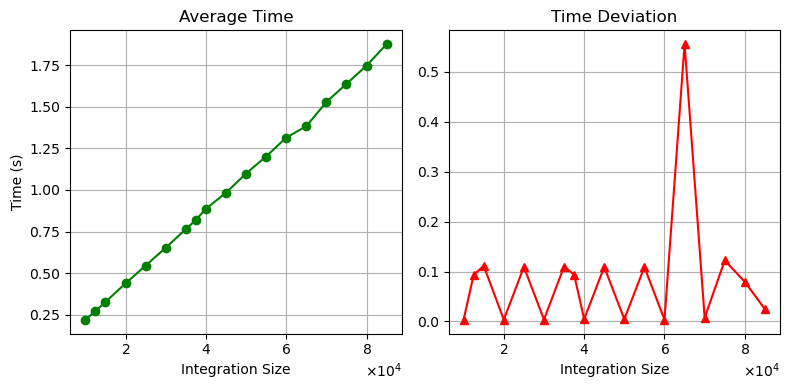

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=False)

# Set scientific notation for both axes
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-4, 4))  # Show scientific notation if values are <1e-3 or >1e3

# Left: Average_Time
axs[0].plot(df['Integration_Size'], df['Average_Time'], marker='o', color='green')
axs[0].set_title('Average Time')
axs[0].set_xlabel('Integration Size')
axs[0].set_ylabel('Time (s)')
axs[0].xaxis.set_major_formatter(formatter)
axs[0].grid(True)

# Right: Time_Deviation
axs[1].plot(df['Integration_Size'], df['Time_Deviation'], marker='^', color='red')
axs[1].set_title('Time Deviation')
axs[1].set_xlabel('Integration Size')
axs[1].xaxis.set_major_formatter(formatter)
axs[1].grid(True)

plt.tight_layout()
plt.show()

Conforme pode ser observado, o padrão do tempo médio de integração apresenta um comportamento linear em relação ao tamanho do vetor de acumulação (Integration_size). Esse resultado está de acordo com a expectativa teórica, dado que um maior número de acumulações implica, naturalmente, em tempos médios mais elevados.

Entretanto, é possível identificar um comportamento peculiar e relativamente periódico nos valores do desvio padrão, com destaque para o ponto correspondente ao valor 65.000 de Acc_len. Nesse caso específico, observam-se anomalias significativas tanto no desvio padrão quanto no tempo médio de integração, quando comparados às demais amostras. Esse comportamento atípico sugere a presença de efeitos sistemáticos ou dessincronia do firmware que merecem investigação adicional.

## Ánalise do Firmware de 32K, 2 inputs

Foi utilizado um novo firmware com apenas dois canais de entrada de sinal analógico, com o objetivo de repetir os testes anteriores e verificar a consistência do comportamento linear do tempo médio de integração em relação ao tamanho do vetor de acumulação (Integration_size) entre diferentes firmwares.

Com esse novo firmware, observou-se um aumento considerável nos tempos de integração. Em razão disso, o intervalo de análise foi reduzido, sendo consideradas apenas integrações com valores de Acc_len entre 2k e 10k.

Adicionalmente, foi aplicado um filtro estatístico aos dados com o intuito de reduzir a influência de valores atípicos no desvio padrão. Essa filtragem se justifica pela possibilidade de ocorrência de falhas de sincronização entre os dados iniciais provenientes da Skarab, o computador host e o programa em Python, o que pode afetar significativamente o tempo registrado nas primeiras integrações.

Para mitigar esse efeito, as três primeiras integrações foram desconsideradas na análise. A partir disso, foram geradas duas séries de dados: a primeira contendo todos os tempos de integração coletados, e a segunda composta apenas por valores cuja diferença absoluta em relação à média (não filtrada) não excedesse três vezes o desvio padrão. Essa abordagem permitiu uma análise mais robusta e representativa dos dados.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [37]:
df = pd.read_csv('Acclen_times_dec16_32k.csv')

In [38]:
df

,Integration_Size,Filtered_Average_time,Filtered_Time_Deviation,Unfiltered_Average_time,Unfiltered_timeDeviation
0,2000,0.3495,0.0050,0.3492,0.0128
1,2500,0.4405,0.0093,0.4400,0.0225
2,3000,0.5241,0.1723,0.5229,0.1736
3,3500,0.6107,0.2154,0.6104,0.2153
4,4000,0.6976,0.2201,0.7021,0.2331
5,4500,0.7862,0.1493,0.7852,0.1536
6,5000,0.8806,0.0153,0.8719,0.0995
7,5500,0.9610,0.1947,0.9595,0.1993
8,6000,1.0484,0.0146,1.0463,0.0652
9,6500,1.1358,0.1590,1.1340,0.0652


### Comparando os dois tempos de integração obtemos:

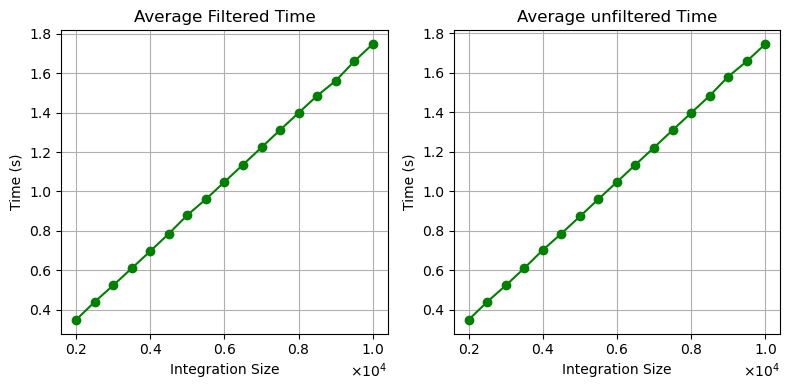

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=False)

# Set scientific notation for both axes
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-4, 4))  # Show scientific notation if values are <1e-3 or >1e3

# Left: Average_Time
axs[0].plot(df['Integration_Size'], df['Filtered_Average_time'], marker='o', color='green')
axs[0].set_title('Average Filtered Time')
axs[0].set_xlabel('Integration Size')
axs[0].set_ylabel('Time (s)')
axs[0].xaxis.set_major_formatter(formatter)
axs[0].grid(True)

# Right: Time_Deviation
axs[1].plot(df['Integration_Size'], df['Unfiltered_Average_time'], marker='o', color='green')
axs[1].set_title('Average unfiltered Time')
axs[1].set_xlabel('Integration Size')
axs[1].set_ylabel('Time (s)')
axs[1].xaxis.set_major_formatter(formatter)
axs[1].grid(True)

plt.tight_layout()
plt.show()

Observa-se, assim como no firmware de 8K com 8 entradas, um comportamento claramente linear do tempo médio de integração em função do tamanho do vetor de acumulação. Adicionalmente, verificou-se que a aplicação do filtro estatístico produziu uma diferença negligenciável nos resultados, indicando que os dados brutos já apresentavam uma distribuição suficientemente estável para fins de análise.

Entretanto, é importante destacar o expressivo aumento no tempo médio de integração observado com o novo firmware de 2 entradas. Por exemplo, para um valor de Acc_len igual a 10.000, o tempo médio registrado foi de aproximadamente 1,7 segundos, enquanto, sob as mesmas condições, o firmware anterior (com 8 entradas) apresentou um tempo médio de apenas 0,2 segundos. Esse acréscimo significativo pode estar relacionado a mudanças na estrutura interna do firmware, à forma de leitura dos dados ou a limitações específicas do novo arranjo de hardware, e merece investigação complementar.

### Comparando os dois Desvios Padrões de Tempo obtemos:

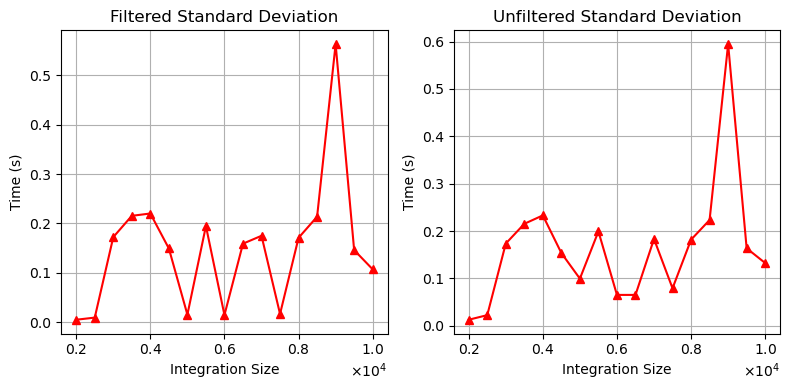

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=False)

# Set scientific notation for both axes
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-4, 4))  # Show scientific notation if values are <1e-3 or >1e3

# Left: Average_Time
axs[0].plot(df['Integration_Size'], df['Filtered_Time_Deviation'], marker='^', color='red')
axs[0].set_title('Filtered Standard Deviation')
axs[0].set_xlabel('Integration Size')
axs[0].set_ylabel('Time (s)')
axs[0].xaxis.set_major_formatter(formatter)
axs[0].grid(True)

# Right: Time_Deviation
axs[1].plot(df['Integration_Size'], df['Unfiltered_timeDeviation'], marker='^', color='red')
axs[1].set_title('Unfiltered Standard Deviation')
axs[1].set_xlabel('Integration Size')
axs[1].set_ylabel('Time (s)')
axs[1].xaxis.set_major_formatter(formatter)
axs[1].grid(True)

plt.tight_layout()
plt.show()

Novamente, observa-se um caráter periódico nos valores do desvio padrão, com exceção do comportamento anômalo registrado em 9k.

Esse padrão é interessante, pois pode indicar características não previstas na relação entre o tamanho do vetor de acumulação e a sincronização entre a FPGA, o computador e o protocolo de comunicação de dados. Tal comportamento sugere a existência de efeitos sistêmicos ou limitações no processo de integração que merecem investigação mais aprofundada.

# RESULTADOS DA ANÁLISE

Os testes realizados confirmaram o padrão esperado de comportamento linear entre o tempo de integração e o tamanho do vetor de acumulação.

Além disso, foi observada uma característica não prevista: uma certa periodicidade no desvio padrão do tempo médio, mesmo após a aplicação de filtros para remoção de valores atípicos. Esse fenômeno pode indicar a existência de uma interferência ou um ponto ótimo de estabilidade na sincronização entre a SKARAB e o computador durante a comunicação de dados, variando conforme o tamanho do vetor de acumulação.

Outro aspecto relevante é a diferença significativa nos tempos de integração entre os firmwares com diferentes números de canais de entrada, sugerindo que a arquitetura interna e a alocação de recursos no FPGA impactam diretamente a eficiência do processamento.

Entretanto, para uma análise mais precisa e robusta, recomenda-se a aplicação direta dessas análises nos dados provenientes do firmware, a fim de reduzir possíveis interferências ou dessincronizações ocasionadas pelo programa auxiliar em Python 3.

Por fim, futuras investigações devem explorar os mecanismos de sincronização e comunicação entre hardware e software, além de avaliar possíveis otimizações no firmware que possam minimizar as anomalias observadas, aumentando a estabilidade e a confiabilidade das medições.